<a href="https://colab.research.google.com/github/ChristianParsons98/YBCO_Data_Analysis/blob/main/Corrected_Sample_Temp_YBCO_March28_APD_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

In [20]:
#Point to the files of interest
Warming="/content/YBCO_Powder_March28_Warming.csv"
Cooling="/content/YBCO_Powder_March28_Cool_V3.csv"
Temp_Correction = "/content/Sample_Temp_Conv.csv"

In [21]:
#Import the file as pandas dataframes
dfWarming = pd.read_csv(Warming)
dfCooling = pd.read_csv(Cooling)
dfTemp_Correction = pd.read_csv(Temp_Correction)

In [22]:
#Check that everything looks ok
dfWarming.head()
#dfTemp_Correction.head()
#list(dfTemp_Correction.columns)

,Temperature_Forward(K),Average_Resistance(Ohms),V_Forward(V),ForwardI(Amps),R_ForwardI(Ohms),Temperature_Backward(K),V_Backward(V),BackwardI(Amps),R_Backward(Ohms),Time_Since_Start(s),True_Time(s)
0,23.09,2.604410e-06,0.000007,0.005,0.001329,23.09,0.000007,-0.005,-0.001324,2.986588,1.743205e+09
1,23.08,1.867395e-06,0.000007,0.005,0.001323,23.08,0.000007,-0.005,-0.001320,13.835004,1.743205e+09
2,23.10,2.166472e-06,0.000007,0.005,0.001316,23.10,0.000007,-0.005,-0.001312,25.842362,1.743205e+09
3,23.15,1.161043e-06,0.000006,0.005,0.001299,23.16,0.000006,-0.005,-0.001297,37.845852,1.743205e+09
4,23.23,5.626820e-07,0.000006,0.005,0.001278,23.25,0.000006,-0.005,-0.001276,49.850786,1.743205e+09


In [23]:
#Convert the columns into numpy arrays to do math and plot
#Warming Data
Warm_Temp = np.asarray(dfWarming['Temperature_Forward(K)'])
Warm_R = -np.asarray(dfWarming['Average_Resistance(Ohms)'])
Warm_RF = -np.asarray(dfWarming['R_ForwardI(Ohms)'])
Warm_RB = -np.asarray(dfWarming['R_Backward(Ohms)'])

#Cooling Data
Cool_Temp = np.asarray(dfCooling['Temperature_Forward(K)'])
Cool_R = -np.asarray(dfCooling['Average_Resistance(Ohms)'])
Cool_RF = -np.asarray(dfCooling['R_ForwardI(Ohms)'])
Cool_RB = -np.asarray(dfCooling['R_Backward(Ohms)'])

#Temp Corrections
Sys_Temp = np.asarray(dfTemp_Correction['T_Sys (K)'])
Cool_Corr = np.asarray(dfTemp_Correction[' T_Sample_Dif_Cool (K)'])
Warm_Corr = np.asarray(dfTemp_Correction[' T_Sample_Dif_Warm (K)'])

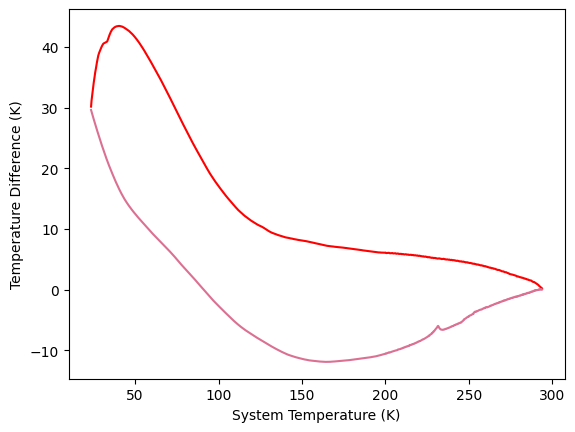

In [24]:
plt.plot(Sys_Temp, Cool_Corr, color='Red', label='Cooling')
plt.plot(Sys_Temp, Warm_Corr, color='palevioletred', label='Warming')
plt.xlabel("System Temperature (K)")
plt.ylabel("Temperature Difference (K)")
plt.show()

In [25]:
#Now we want to be able to interpolate the temperature difference for any system temperature.
#Here we just use a simple linear interpolation due to the density of data.
spline_interp_Cool = interp1d(Sys_Temp, Cool_Corr, kind='linear', fill_value='extrapolate')
spline_interp_Warm = interp1d(Sys_Temp, Warm_Corr, kind='linear', fill_value='extrapolate')

#Defining two functions for easy use.
#They return the corrected temperature - i.e. the temperature at the sample.
def Corrected_Temp_Cool(TC_input):
    return TC_input+spline_interp_Cool(TC_input)

def Corrected_Temp_Warm(TW_input):
    return TW_input+spline_interp_Warm(TW_input)

In [26]:
#These are the corrected sample temperatures
Warm_Temp=Corrected_Temp_Warm(Warm_Temp)
Cool_Temp=Corrected_Temp_Cool(Cool_Temp)

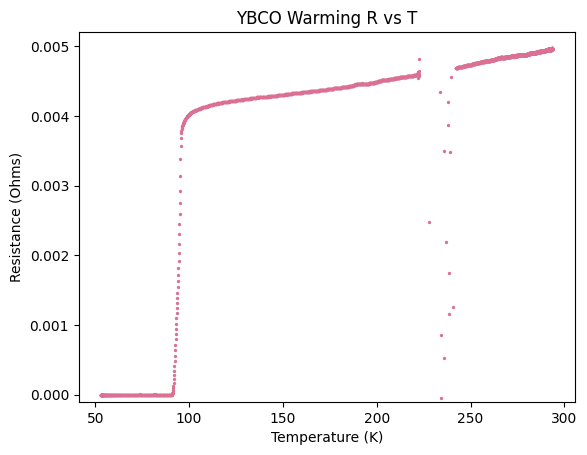

In [27]:
plt.scatter(Warm_Temp,Warm_R,color='palevioletred',s=1.90)

plt.ylim(-0.0001,0.0052)
plt.title("YBCO Warming R vs T")
plt.ylabel("Resistance (Ohms)")
plt.xlabel("Temperature (K)")
plt.savefig("YBCO_Warming_Full.png",dpi=900)
plt.show()


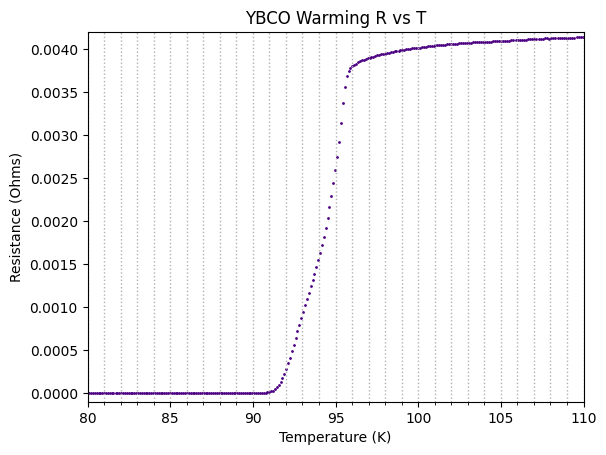

In [28]:
plt.scatter(Warm_Temp,Warm_R,color='indigo',s=1)
plt.ylim(-0.0001,0.0042)
plt.xlim(80,110)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.title("YBCO Warming R vs T")
plt.ylabel("Resistance (Ohms)")
plt.xlabel("Temperature (K)")
plt.grid(True, which='both', axis='x', linestyle=':', linewidth=1)
plt.savefig("YBCO_Warming_Zoomed.png",dpi=500)
plt.show()



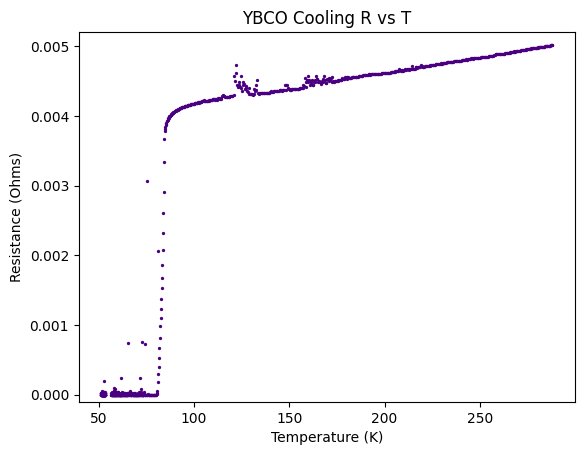

In [29]:
plt.scatter(Cool_Temp,Cool_R,color='Indigo',s=1.90)
plt.ylim(-0.0001,0.0052)
plt.title("YBCO Cooling R vs T")
plt.ylabel("Resistance (Ohms)")
plt.xlabel("Temperature (K)")
plt.savefig("YBCO_Cooling_Full.png",dpi=900)
plt.show()

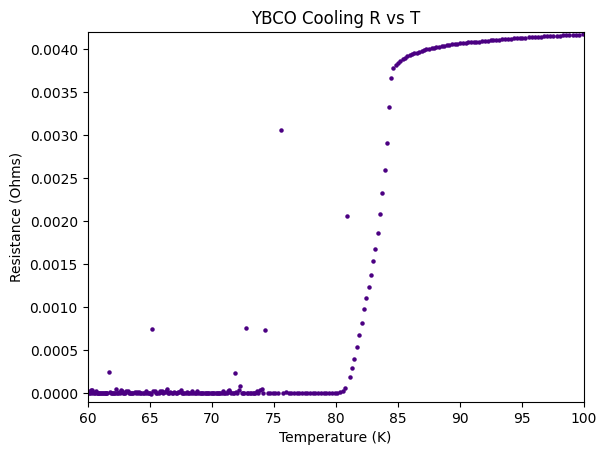

In [31]:
plt.scatter(Cool_Temp,Cool_R,color='Indigo',s=4.90)
plt.ylim(-0.0001,0.0042)
plt.xlim(60,100)
plt.title("YBCO Cooling R vs T")
plt.ylabel("Resistance (Ohms)")
plt.xlabel("Temperature (K)")
plt.savefig("YBCO_Cooling_Zoomed.png",dpi=900)
plt.show()